In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette="Set2", font_scale=1.2, rc={"figure.figsize": [20,10]})
%matplotlib inline

pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)

In [2]:
import os
currentpath = os.getcwd()
lenders_path = os.path.join(currentpath,'Data/lenders.csv')
loans_path = os.path.join(currentpath,'Data/loans.csv')
loans_lenders_path = os.path.join(currentpath,'Data/loans_lenders.csv')
lender_mapping = pd.read_csv(loans_lenders_path)
loans = pd.read_csv(loans_path)
lenders = pd.read_csv(lenders_path)

In [4]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1336583,Susan,English,"As a married parent of six children, Susan wor...","As a married parent of six children, Susan wor...",200.00,200.00,funded,2580138.00,NaN,Food,Food,to buy more frozen foods to sell,PH,Philippines,"Guimaras, Iloilo",shared,0.10,PHP,145.00,2017-07-10 04:25:27.000 +0000,2017-08-20 00:30:05.000 +0000,2017-06-23 07:00:00.000 +0000,2017-07-21 00:37:38.000 +0000,8.00,2,1,1,"#Parent, #Woman-Owned Business, #Repeat Borrower",Susan,female,true,monthly,field_partner
1,290654,Dinah,English,"Dinah, 42, is married and has five children. S...",NaN,300.00,300.00,funded,750799.00,NaN,Pub,Food,To buy seats and more drinks to sell,UG,Uganda,Kasese,shared,0.20,UGX,163.00,2011-04-15 08:14:59.000 +0000,NaN,2011-03-30 07:00:00.000 +0000,2011-04-16 14:39:02.000 +0000,8.00,11,1,1,NaN,Dinah,female,true,irregular,field_partner
2,544788,Nena,English,Nena works hard to support her family. Nena is...,NaN,375.00,375.00,funded,1325844.00,NaN,Fish Selling,Food,to buy additional boxes of fish to sell.,PH,Philippines,"La Carlota, Negros Occidental",shared,0.10,PHP,145.00,2013-04-03 09:24:26.000 +0000,2013-05-05 16:10:02.000 +0000,2013-03-15 07:00:00.000 +0000,2013-04-06 13:42:42.000 +0000,11.00,10,2,1,volunteer_pick,Nena,female,true,monthly,field_partner
3,1801869,Clarita,English,"Clarita is 69 years old, married, and has two ...","Clarita is 69 years old, married, and has two ...",400.00,400.00,funded,3206591.00,NaN,General Store,Retail,"to buy items such as canned goods, personal ca...",PH,Philippines,"Guimaras, Iloilo",shared,0.10,PHP,145.00,2019-07-19 03:01:23.000 +0000,2019-08-20 20:40:16.000 +0000,2019-07-11 07:00:00.000 +0000,2019-07-22 01:15:29.000 +0000,7.00,12,1,1,"#Elderly, #Woman-Owned Business",Clarita,female,true,monthly,field_partner
4,1566050,JUVY,English,"Juvy, age 52, earns her living through raising...","Juvy, age 52, earns her living through raising...",300.00,300.00,funded,2894942.00,NaN,Pigs,Agriculture,"to buy feed for her hogs, as well as materials...",PH,Philippines,"Concepcion, Iloilo",shared,0.10,PHP,125.00,2018-07-11 08:59:12.000 +0000,2018-08-11 20:40:04.000 +0000,2018-06-22 07:00:00.000 +0000,2018-07-15 08:56:14.000 +0000,9.00,8,1,1,"#Animals, user_favorite, #Elderly",JUVY,female,true,monthly,field_partner


In [5]:
# Calculate funding ratio
loans['funding_ratio'] = loans.FUNDED_AMOUNT / loans.LOAN_AMOUNT
loans['fully_funded'] = loans.funding_ratio >= 1

In [6]:
loans['POSTED_DATE'] = pd.to_datetime(loans['POSTED_TIME']).dt.date

In [7]:
loans['POSTED_YEAR']= pd.to_datetime(loans['POSTED_DATE']).dt.year

In [8]:
loans_2019 = loans[loans['POSTED_YEAR']==2019].reset_index()

In [197]:
loans_2020 = loans[loans['POSTED_YEAR']==2020].reset_index()

In [9]:
loans_2019.head()

,index,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,funding_ratio,fully_funded,POSTED_DATE,POSTED_YEAR
0,3,1801869,Clarita,English,"Clarita is 69 years old, married, and has two ...","Clarita is 69 years old, married, and has two ...",400.00,400.00,funded,3206591.00,NaN,General Store,Retail,"to buy items such as canned goods, personal ca...",PH,Philippines,"Guimaras, Iloilo",shared,0.10,PHP,145.00,2019-07-19 03:01:23.000 +0000,2019-08-20 20:40:16.000 +0000,2019-07-11 07:00:00.000 +0000,2019-07-22 01:15:29.000 +0000,7.00,12,1,1,"#Elderly, #Woman-Owned Business",Clarita,female,true,monthly,field_partner,1.00,True,2019-07-19,2019
1,17,1862433,Jamiru,English,"Jamiru is a married man with two children, wit...","Jamiru is a married man with two children, wit...",75.00,75.00,funded,3288294.00,NaN,Motorcycle Transport,Transportation,to buy a second motorcycle to increase his inc...,UG,Uganda,Jinja,shared,0.00,UGX,222.00,2019-10-22 13:52:45.000 +0000,2019-11-25 18:20:05.000 +0000,2019-10-04 07:00:00.000 +0000,2019-11-25 18:22:02.000 +0000,14.00,3,1,1,"#Parent, #Biz Durable Asset, user_favorite",Jamiru,male,true,monthly,field_partner,1.00,True,2019-10-22,2019
2,23,1770065,Champa's Group,English,Champa’s Group lives in a rural village in Kan...,Champa’s Group lives in a rural village in Kan...,250.00,250.00,funded,3164727.00,NaN,Home Appliances,Personal Use,to buy a water filter to provide safe drinking...,KH,Cambodia,Kandal,shared,0.10,KHR,311.00,2019-05-27 09:28:31.000 +0000,2019-06-27 22:40:04.000 +0000,2019-05-26 07:00:00.000 +0000,2019-05-29 10:57:47.000 +0000,8.00,9,2,1,NaN,"Say, Champa, Kimchheng, Saikea, Kimsry","male, female, female, female, female","true, true, true, true, true",monthly,field_partner,1.00,True,2019-05-27,2019
3,32,1899384,Evelyn,English,Evelyn is a single woman with two children. Sh...,Evelyn is a single woman with two children. Sh...,600.00,600.00,funded,3340778.00,NaN,General Store,Retail,to purchase items to sell like canned goods an...,PH,Philippines,"San Carlos, Negros Occidental",standard,NaN,PHP,145.00,2019-12-19 09:35:50.000 +0000,2020-02-16 17:55:56.000 +0000,2019-11-28 08:00:00.000 +0000,2020-02-01 10:43:46.000 +0000,14.00,22,1,1,"#Single Parent, #Parent, #Woman-Owned Business",Evelyn,female,true,monthly,field_partner,1.00,True,2019-12-19,2019
4,52,1835971,Christopher,English,"Christopher, 54-year-old father of seven, is a...","Christopher, 54-year-old father of seven, is a...",300.00,300.00,funded,3253394.00,NaN,Farming,Agriculture,"to buy hybrid seeds and good fertilizer, so an...",KE,Kenya,"Eldoret, Rift Valley",shared,0.00,KES,156.00,2019-09-16 04:22:02.000 +0000,2019-10-16 05:50:07.000 +0000,2019-09-13 07:00:00.000 +0000,2019-09-26 12:12:32.000 +0000,14.00,9,1,1,#Elderly,Christopher,male,true,monthly,field_partner,1.00,True,2019-09-16,2019


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import *
import re

### Text standardisation

In [12]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [13]:
contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

def to_sentences(passage):
    
    sentences = sent_tokenize(passage)    
    sentences = [expand_contractions(i) for i in sentences]
    sentences = [re.sub('\n', '', i) for i in sentences]
    return sentences

### Sentence Scoring based on Word Freqency 

In [14]:
# generate frequency of words
def create_freq_table(text_string):
    stopwords_list = set(stopwords.words('english'))
    
    text_string = ' '.join(text_string)
    words = word_tokenize(text_string)
    
    ps = PorterStemmer()
    
    freq_table = {}
    
    for word in words:
        #stem word 
        word = ps.stem(word)
        
        #remove stopwords
        if word in stopwords_list: 
            continue
        elif word in freq_table:
            freq_table[word] += 1
        else:
            freq_table[word] = 1
            
    return freq_table

In [153]:
# score the sentences based on frequency of word
def score_sentences(sentences, freq_table):
    
    sentence_value = {}
    
    for sentence in sentences:
        word_count_in_sentence = len(word_tokenize(sentence))
        
        for wordValue in freq_table:
            
            if wordValue.lower() in sentence.lower():                
                if sentence in sentence_value:
                    sentence_value[sentence] += freq_table[wordValue]
                else:
                    sentence_value[sentence] = freq_table[wordValue]

        sentence_value[sentence] = sentence_value[sentence] // word_count_in_sentence
    return sentence_value

# find the average score of paragraph
def find_average_score(sentence_value):
    sum_values = 0
    
    for entry in sentence_value:
        sum_values += sentence_value[entry]
        
    average = sum_values/len(sentence_value)
    
    return average

# return the summary
def generate_summary(sentences, sentence_value, threshold):
    sentence_count = 0
    
    summary = ''
    
    for sentence in sentences:
        if sentence in sentence_value and sentence_value[sentence] >= threshold:
            summary += " " + sentence
            sentence_count += 1
            
    return summary

# return the summary
def generate_summary_topN(sentence_scores, n):
    
    top_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:n]
    all_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
 
    return ' '.join(top_sentences)

In [135]:
# test 1 passage
passage = loans['DESCRIPTION'][10]

sentences = to_sentences(passage)
freq_table = create_freq_table(sentences)
sentence_scores = score_sentences(sentences, freq_table)
threshold = find_average_score(sentence_scores)
summary = generate_summary(sentences, sentence_scores, 1.0 * threshold)

print(re.sub('\n','',summary))
print(len(passage))
print(len(summary))

 Clara is 53 years old and lives in the Philippines. She is widowed with eight children. \r\n\r\nClara has a shop that sells canned goods, snacks and beverages. She has had this business for five years. She requested a loan for PHP 15,000 to buy canned goods, snacks and beverages.\r\n\r\nClara has been a member of HSPFI since 2010. In the future, Clara hopes to improve her business.\r\n
388
389


In [217]:
desc = pd.DataFrame(loans_2019[['LOAN_ID','DESCRIPTION','fully_funded']].astype(str))

desc['description_clean'] = desc.apply(lambda r: r['DESCRIPTION'].replace('<br /><br />',' '),axis=1)
desc['sentences'] = desc.apply(lambda r: to_sentences(r['DESCRIPTION']),axis=1)
desc['freq_table'] = desc.apply(lambda r: create_freq_table(r['sentences']),axis=1)
desc['sentence_scores'] = desc.apply(lambda r: score_sentences(r['sentences'],r['freq_table']),axis=1)
desc['threshold'] = desc.apply(lambda r: find_average_score(r['sentence_scores']),axis=1)
desc['num_sentences'] = desc['sentence_scores'].apply(len)
desc['length_desc'] = desc['DESCRIPTION'].apply(len)

desc.head()

,LOAN_ID,DESCRIPTION,fully_funded,description_clean,sentences,freq_table,sentence_scores,threshold,num_sentences,length_desc
0,1801869,"Clarita is 69 years old, married, and has two ...",True,"Clarita is 69 years old, married, and has two ...","[Clarita is 69 years old, married, and has two...","{'clarita': 3, '69': 1, 'year': 2, 'old': 1, '...","{'Clarita is 69 years old, married, and has tw...",0.75,4,407
1,1862433,"Jamiru is a married man with two children, wit...",True,"Jamiru is a married man with two children, wit...","[Jamiru is a married man with two children, wi...","{'jamiru': 3, 'marri': 1, 'man': 1, 'two': 1, ...","{'Jamiru is a married man with two children, w...",1.33,6,497
2,1770065,Champa’s Group lives in a rural village in Kan...,True,Champa’s Group lives in a rural village in Kan...,[Champa’s Group lives in a rural village in Ka...,"{'champa': 3, '’': 1, 'group': 1, 'live': 1, '...",{'Champa’s Group lives in a rural village in K...,0.75,4,356
3,1899384,Evelyn is a single woman with two children. Sh...,True,Evelyn is a single woman with two children. Sh...,"[Evelyn is a single woman with two children., ...","{'evelyn': 5, 'singl': 1, 'woman': 1, 'two': 1...",{'Evelyn is a single woman with two children.'...,1.00,6,429
4,1835971,"Christopher, 54-year-old father of seven, is a...",True,"Christopher, 54-year-old father of seven, is a...","[Christopher, 54-year-old father of seven, is ...","{'christoph': 3, ',': 4, '54-year-old': 1, 'fa...","{'Christopher, 54-year-old father of seven, is...",1.14,7,1068


In [218]:
# get summary
desc['summary'] = desc.apply(lambda r: generate_summary(r['sentences'],r['sentence_scores'],1.0*r['threshold']),axis=1)
desc['length_summary'] = desc['summary'].apply(len)
desc['summary'] = desc.apply(lambda r: r['summary'].replace('<br /><br />',''),axis=1)

# get summary
desc['summary_v2'] = desc.apply(lambda r: generate_summary(r['sentences'],r['sentence_scores'],1.0*r['threshold']+0.5),axis=1)
desc['length_summary_v2'] = desc['summary_v2'].apply(len)
desc['summary_v2'] = desc.apply(lambda r: r['summary_v2'].replace('<br /><br />',''),axis=1)

# get top 3
desc['summary_top3'] = desc.apply(lambda r: generate_summary_topN(r['sentence_scores'],3),axis=1)
desc['length_summary_v3'] = desc['summary_top3'].apply(len)
desc['summary_top3'] = desc.apply(lambda r: r['summary_top3'].replace('<br /><br />',''),axis=1)

In [194]:
num = 10
print(f"LOAN_ID: {desc['LOAN_ID'][num]}")
print('Original loan description: ')
print(desc['description_clean'][num])
print('Summary by Average Score: ')
print(desc['summary'][num])
print('Summary by Top 3 Sentences: ')
print(desc['summary_top3'][num])

LOAN_ID: 1693029
Original loan description: 
Kennedy is a married man with five children. He describes himself to be honest and hardworking. He operates a retail business where he sells fish net. He has been involved in this business for five years. His business is located in a good area, and his primary customers are locals. He describes his biggest business challenge to be inadequate working capital. He will use the Kes 50,000 loan to buy more materials for making fish net in order to meet demand in Bondo, where fishing is the main activity, since it is  located near Lake Victoria. His business goal is to have more helpers in making fish net within five years. He hopes that in the future he will be able to provide for his family effectively. This is his first loan with SMEP Microfinance Bank. He will use the anticipated profits to buy more materials for making fish net.
Summary by Average Score: 
 He describes himself to be honest and hardworking. He operates a retail business where 

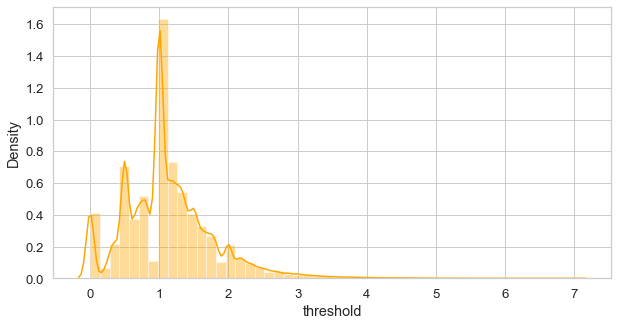

In [113]:
plt.figure(figsize=(10,5))

sns.distplot(desc['threshold'],color='orange',label='threshold')

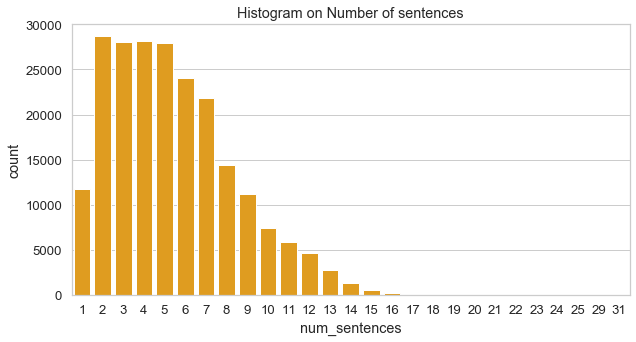

In [114]:
plt.figure(figsize=(10,5))

plt.title('Histogram on Number of sentences')
sns.countplot(desc['num_sentences'],color='orange',label='threshold')


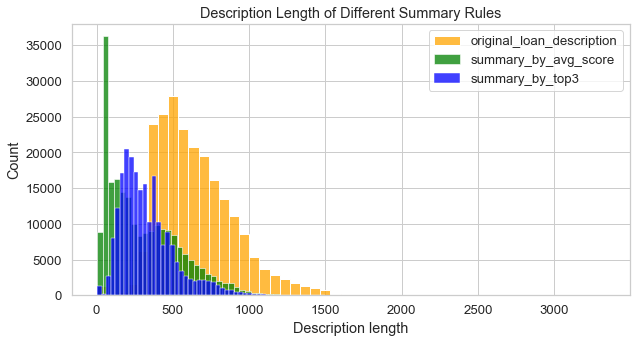

In [165]:
plt.figure(figsize=(10,5))
plt.title('Description Length of Different Summary Rules')
sns.histplot(desc, x='length_desc',bins=50,color='orange',label='original_loan_description')
sns.histplot(desc, x='length_summary',bins=50,color='green',label='summary_by_avg_score')
# sns.histplot(desc, x='length_summary_v2',bins=50,color='red',label='summary_by_avg_score_adjusted')
sns.histplot(desc, x='length_summary_v3',bins=50,color='blue',label='summary_by_top3')

plt.xlabel('Description length')
plt.legend()


In [196]:
desc['length_summary'].value_counts(bins=50,normalize=True)

(39.3, 76.6]       0.17
(113.9, 151.2]     0.07
(76.6, 113.9]      0.07
(151.2, 188.5]     0.07
(188.5, 225.8]     0.06
(225.8, 263.1]     0.05
(375.0, 412.3]     0.04
(412.3, 449.6]     0.04
(337.7, 375.0]     0.04
(449.6, 486.9]     0.04
(0.134, 39.3]      0.04
(300.4, 337.7]     0.04
(486.9, 524.2]     0.04
(263.1, 300.4]     0.04
(524.2, 561.5]     0.03
(561.5, 598.8]     0.03
(598.8, 636.1]     0.02
(636.1, 673.4]     0.02
(673.4, 710.7]     0.02
(710.7, 748.0]     0.01
(748.0, 785.3]     0.01
(785.3, 822.6]     0.01
(859.9, 897.2]     0.01
(822.6, 859.9]     0.01
(897.2, 934.5]     0.01
(934.5, 971.8]     0.00
(971.8, 1009.1]    0.00
(1009.1, 1046.4]   0.00
(1046.4, 1083.7]   0.00
(1083.7, 1121.0]   0.00
(1121.0, 1158.3]   0.00
(1158.3, 1195.6]   0.00
(1195.6, 1232.9]   0.00
(1232.9, 1270.2]   0.00
(1270.2, 1307.5]   0.00
(1307.5, 1344.8]   0.00
(1344.8, 1382.1]   0.00
(1382.1, 1419.4]   0.00
(1419.4, 1456.7]   0.00
(1456.7, 1494.0]   0.00
(1494.0, 1531.3]   0.00
(1531.3, 1568.6]

In [219]:
desc['is_fully_funded'] = desc['fully_funded']
desc['is_fully_funded'] = np.where(desc['is_fully_funded']=='True',1,0)

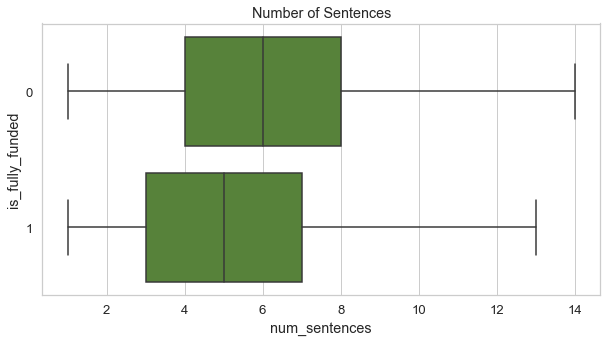

In [225]:
plt.figure(figsize=(10,5))

plt.title('Number of Sentences')
sns.boxplot(y='is_fully_funded',x='num_sentences',data=desc,color='#558E2E',orient='h',showfliers=False)


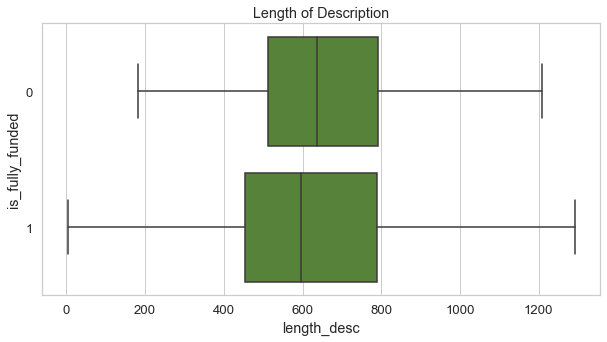

In [226]:
plt.figure(figsize=(10,5))

plt.title('Length of Description')
sns.boxplot(y='is_fully_funded',x='length_desc',data=desc,color='#558E2E',orient='h',showfliers=False)


In [224]:
desc.groupby('is_fully_funded')['length_desc'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fully_funded,,,,,,,,
0,15677.00,667.89,257.83,3.00,512.00,636.00,791.00,1992.00
1,203328.00,642.75,248.58,3.00,455.00,595.00,790.00,3327.00


In [198]:
desc_2020 = pd.DataFrame(loans_2020[['LOAN_ID','DESCRIPTION','fully_funded']].astype(str))

desc_2020['description_clean'] = desc_2020.apply(lambda r: r['DESCRIPTION'].replace('<br /><br />',' '),axis=1)
desc_2020['sentences'] = desc_2020.apply(lambda r: to_sentences(r['DESCRIPTION']),axis=1)
desc_2020['freq_table'] = desc_2020.apply(lambda r: create_freq_table(r['sentences']),axis=1)
desc_2020['sentence_scores'] = desc_2020.apply(lambda r: score_sentences(r['sentences'],r['freq_table']),axis=1)
desc_2020['threshold'] = desc_2020.apply(lambda r: find_average_score(r['sentence_scores']),axis=1)
desc_2020['num_sentences'] = desc_2020['sentence_scores'].apply(len)
desc_2020['length_desc'] = desc_2020['DESCRIPTION'].apply(len)

desc_2020.head()

,LOAN_ID,DESCRIPTION,fully_funded,description_clean,sentences,freq_table,sentence_scores,threshold,num_sentences,length_desc
0,1953482,Ana esta soltera y tiene tres hijos. Vive con ...,True,Ana esta soltera y tiene tres hijos. Vive con ...,"[Ana esta soltera y tiene tres hijos., Vive co...","{'ana': 3, 'esta': 1, 'soltera': 1, 'tien': 3,...","{'Ana esta soltera y tiene tres hijos.': 3, 'V...",2.33,9,812
1,1959215,"Margaret is known as a hardworking woman, who ...",True,"Margaret is known as a hardworking woman, who ...","[Margaret is known as a hardworking woman, who...","{'margaret': 3, 'known': 1, 'hardwork': 1, 'wo...","{'Margaret is known as a hardworking woman, wh...",0.86,7,770
2,1977507,Osvaldo Maria es un microempresario de 41 años...,False,Osvaldo Maria es un microempresario de 41 años...,[Osvaldo Maria es un microempresario de 41 año...,"{'osvaldo': 1, 'maria': 1, 'es': 2, 'un': 1, '...",{'Osvaldo Maria es un microempresario de 41 añ...,2.00,3,997
3,1931152,"Nafije and her retired husband, seen in the ph...",True,"Nafije and her retired husband, seen in the ph...","[Nafije and her retired husband, seen in the p...","{'nafij': 4, 'retir': 1, 'husband': 3, ',': 4,...","{'Nafije and her retired husband, seen in the ...",0.71,7,949
4,1945291,"In Tajiks’ centuries-old tradition, a child’s ...",True,"In Tajiks’ centuries-old tradition, a child’s ...","[In Tajiks’ centuries-old tradition, a child’s...","{'In': 1, 'tajik': 2, '’': 3, 'centuries-old':...","{'In Tajiks’ centuries-old tradition, a child’...",1.82,11,718


In [199]:
# get summary
desc_2020['summary'] = desc_2020.apply(lambda r: generate_summary(r['sentences'],r['sentence_scores'],1.0*r['threshold']),axis=1)
desc_2020['length_summary'] = desc_2020['summary'].apply(len)
desc_2020['summary'] = desc_2020.apply(lambda r: r['summary'].replace('<br /><br />',''),axis=1)

# get summary
desc_2020['summary_v2'] = desc_2020.apply(lambda r: generate_summary(r['sentences'],r['sentence_scores'],1.0*r['threshold']+0.5),axis=1)
desc_2020['length_summary_v2'] = desc_2020['summary_v2'].apply(len)
desc_2020['summary_v2'] = desc_2020.apply(lambda r: r['summary_v2'].replace('<br /><br />',''),axis=1)

# get top 3
desc_2020['summary_top3'] = desc_2020.apply(lambda r: generate_summary_topN(r['sentence_scores'],3),axis=1)
desc_2020['length_summary_v3'] = desc_2020['summary_top3'].apply(len)
desc_2020['summary_top3'] = desc_2020.apply(lambda r: r['summary_top3'].replace('<br /><br />',''),axis=1)

In [211]:
print(desc_2020[desc_2020['LOAN_ID']=='1931004']['summary_top3'].iloc[0])

She is a hardworking business lady who supports her family through her shoe selling business. She is seeking a loan to add stock of shoes for selling which she plans to pay back using the profits she makes from her business. Her main challenge is lack of enough capital to restock as her goods often move first whilst she still has to meet other basic needs such as food.
